In [1]:

import pandas as pd

# 사용할 모델
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from freeman.plt_setting import plt_settings
from freeman.evaluation import regression_evaluation, f_importances, plot_actual_pred
from freeman.aiddd.data_manager import read_data

plt_settings()

In [2]:
df_data = read_data('2nd pp pole-position-on-cons-1st')

In [3]:
feature_columns = df_data.select_dtypes(include=['number']).columns.tolist()
target_column = '총공사비'
feature_columns.remove(target_column)
# feature_columns.remove('pole_cnts')

In [4]:
df_X = df_data[feature_columns+[target_column]]
df_y = df_X.pop(target_column)

In [5]:
X_train, X_test, y_train, y_test = \
    train_test_split(df_X, df_y, test_size=0.1)

In [6]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [7]:
SEED = 123
ml_models = {
    'LASSO': Lasso(),
    'RIDGE': Ridge(),
    'KNR': KNeighborsRegressor(),
    'DTR': DecisionTreeRegressor(),
    'RFR': RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=SEED),
    'GBR': GradientBoostingRegressor(),
    'EN': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=SEED),
    'XGR': XGBRegressor(eta=0.01, n_estimators=100, n_jobs=-1),
}

In [8]:
def model_fit_and_evaluation(model_key, display_start=0, display_size=50):
    model = ml_models[model_key]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f'Evaluation: {model_key}')
    evaluation_value = regression_evaluation(y_test, predictions)
    evaluation_values.append(evaluation_value)
    model_names.append(model_key)
    try:
        f_importances(model, feature_columns, model_key)
    except AttributeError as e:
        print(f'`{model_key}` object has no attribute `feature_importances_`')
    plot_actual_pred(
        y_test[display_start:display_start+display_size],
        predictions[display_start:display_start+display_size],
        model_key
    )

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.125e+16, tolerance: 3.986e+13
  model = cd_fast.enet_coordinate_descent(


Evaluation: LASSO
R2_SCORE: 0.548763, MAPE: 29.665815, MSE: 14166896177829.685547, RMSE: 3763893.752197, MAE: 1811165.558070
`LASSO` object has no attribute `feature_importances_`


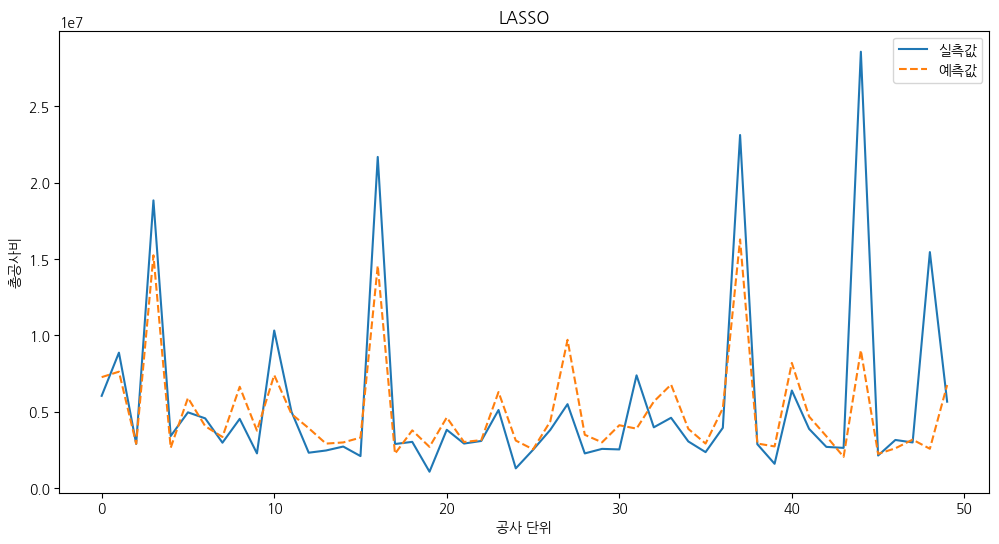

Evaluation: RIDGE
R2_SCORE: 0.548003, MAPE: 29.572702, MSE: 14190751615154.451172, RMSE: 3767061.403157, MAE: 1810468.301725
`RIDGE` object has no attribute `feature_importances_`


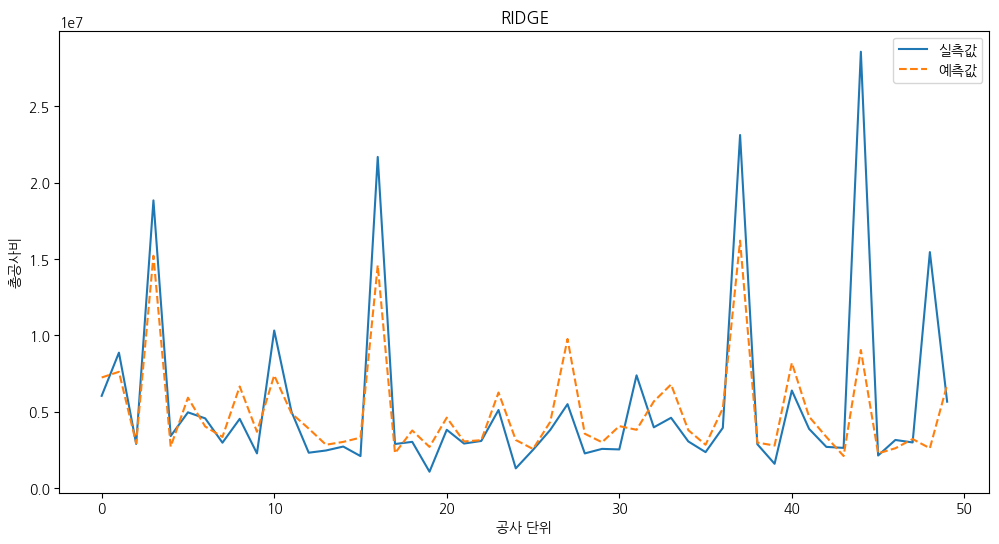

Evaluation: KNR
R2_SCORE: 0.519742, MAPE: 27.436731, MSE: 15078025736510.337891, RMSE: 3883043.360112, MAE: 1793952.903038
`KNR` object has no attribute `feature_importances_`


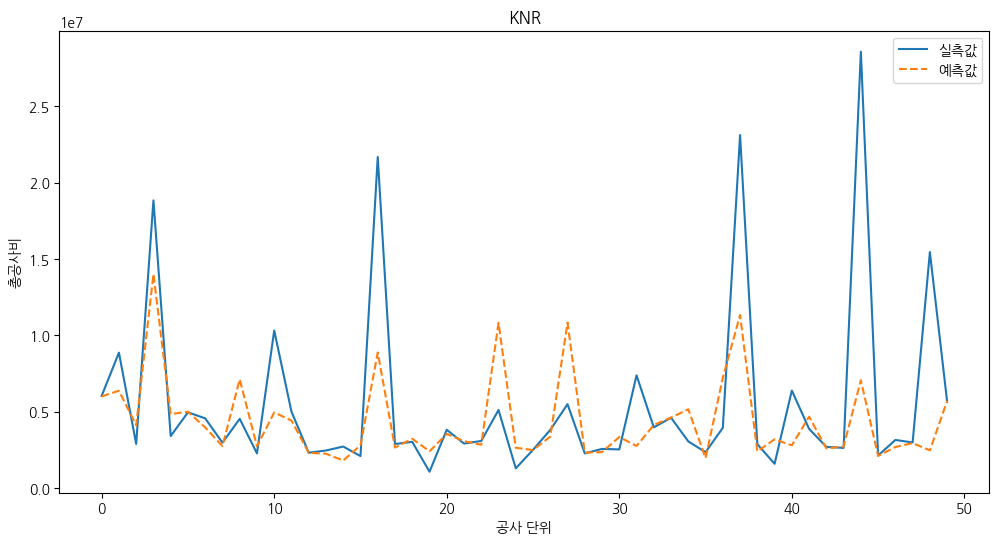

Evaluation: DTR
R2_SCORE: 0.187462, MAPE: 39.711157, MSE: 25510196493018.117188, RMSE: 5050761.971526, MAE: 2359101.698811


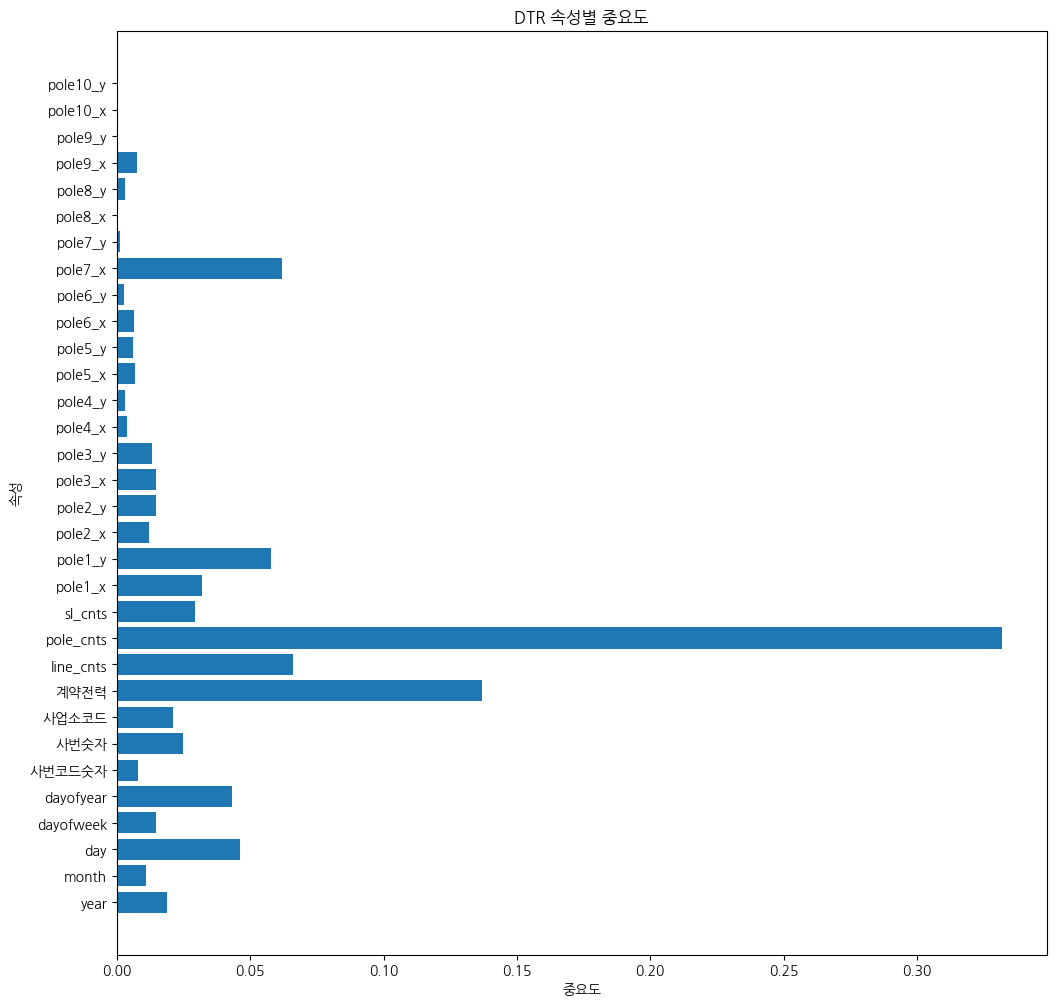

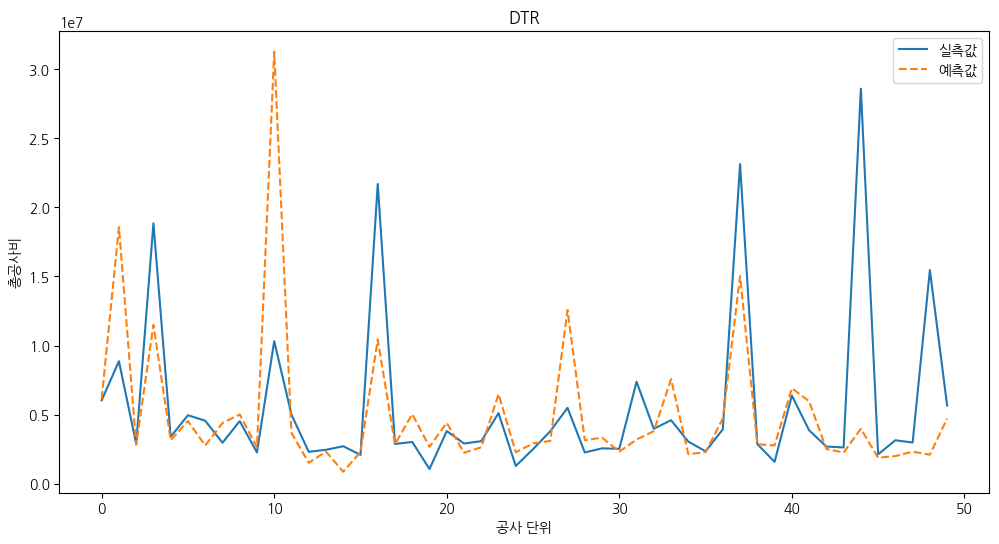

Evaluation: RFR
R2_SCORE: 0.599557, MAPE: 29.709239, MSE: 12572169715517.564453, RMSE: 3545725.555583, MAE: 1739903.405261


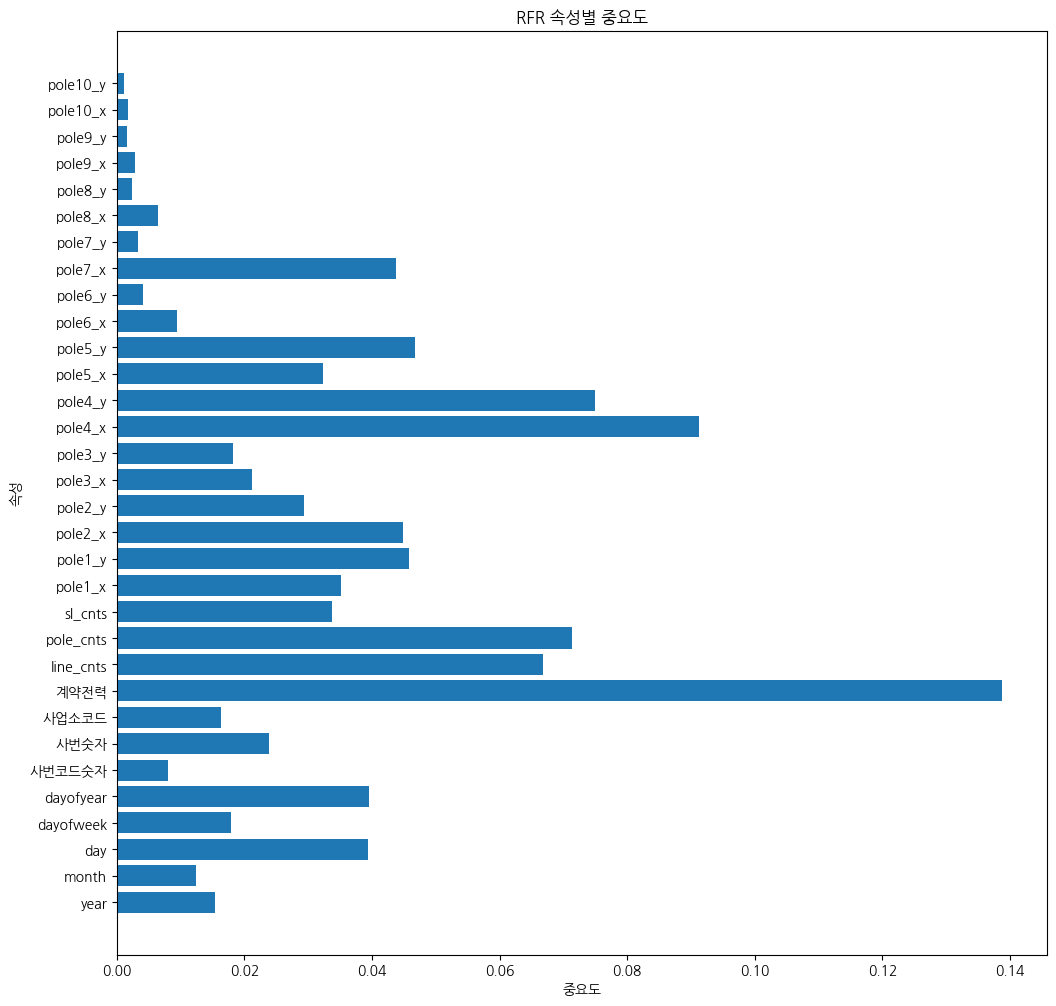

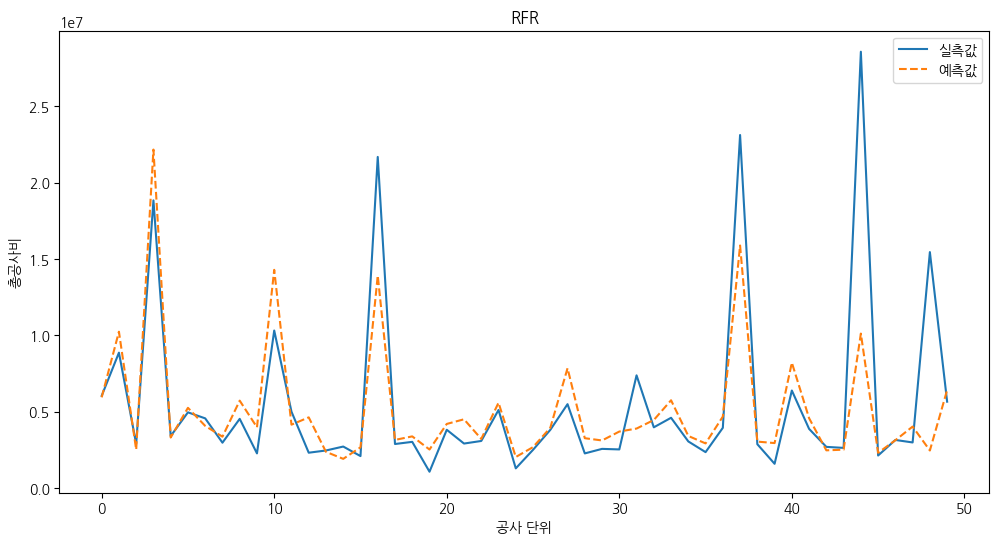

Evaluation: GBR
R2_SCORE: 0.633721, MAPE: 28.085590, MSE: 11499596408832.283203, RMSE: 3391105.484769, MAE: 1637204.602019


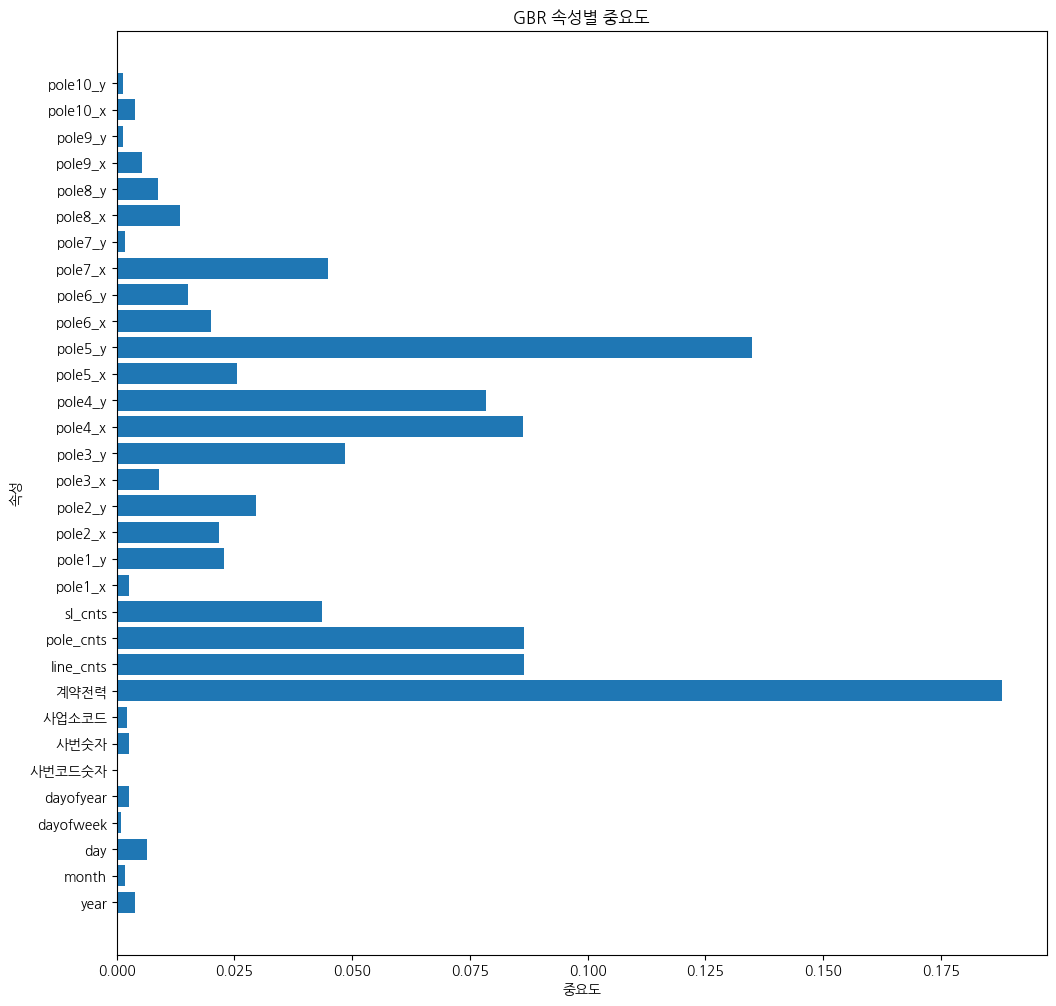

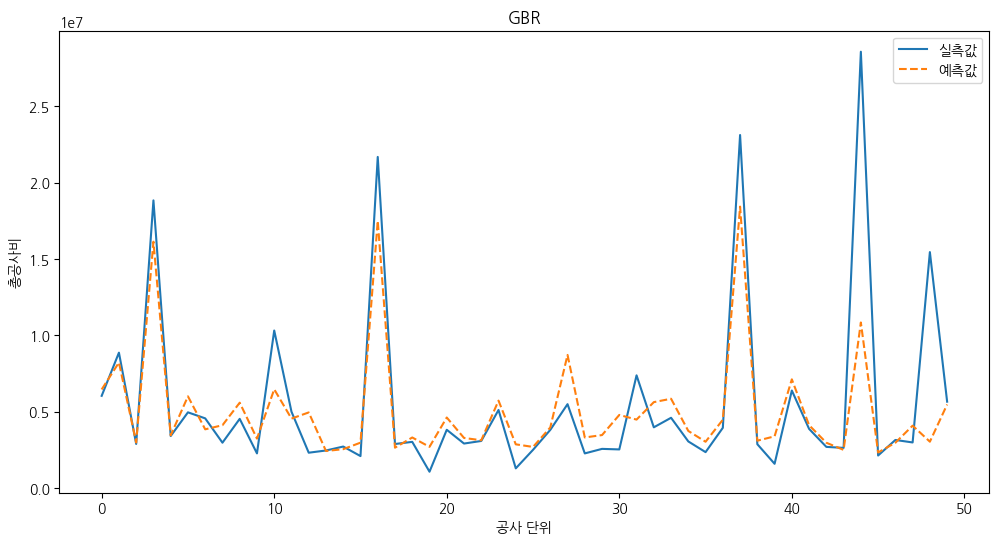

Evaluation: EN
R2_SCORE: 0.549067, MAPE: 29.814177, MSE: 14157341108312.343750, RMSE: 3762624.231612, MAE: 1810375.306683
`EN` object has no attribute `feature_importances_`


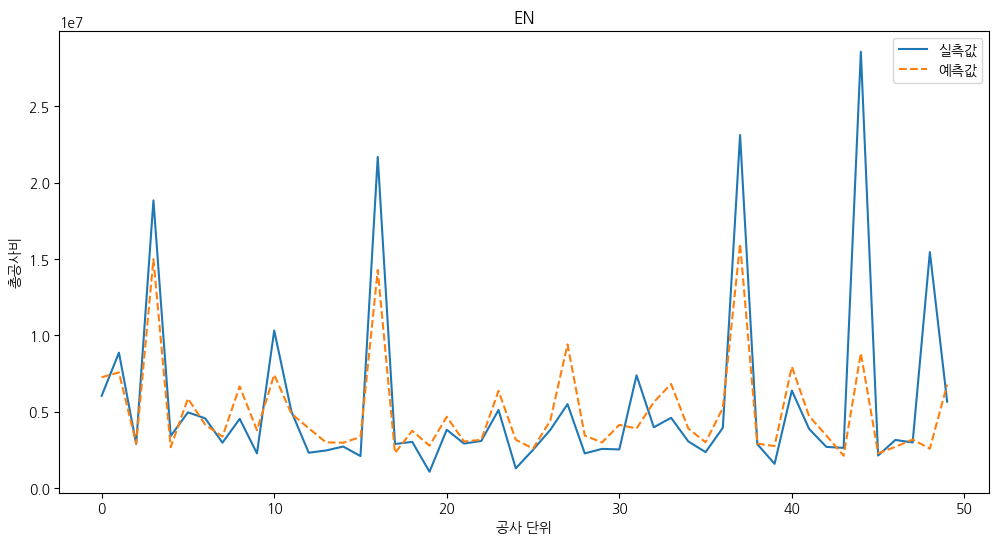

Evaluation: XGR
R2_SCORE: 0.371157, MAPE: 31.813921, MSE: 19742944846483.890625, RMSE: 4443303.370971, MAE: 2208512.609396


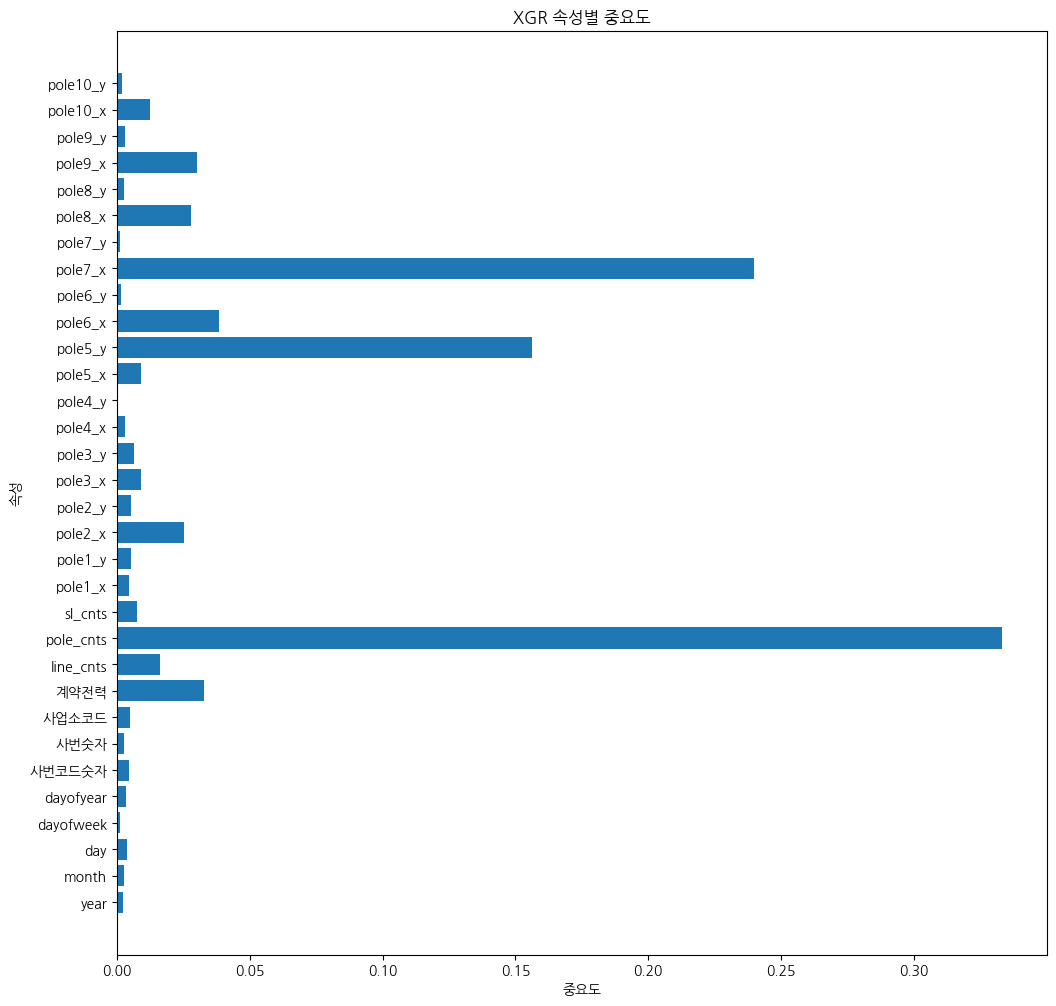

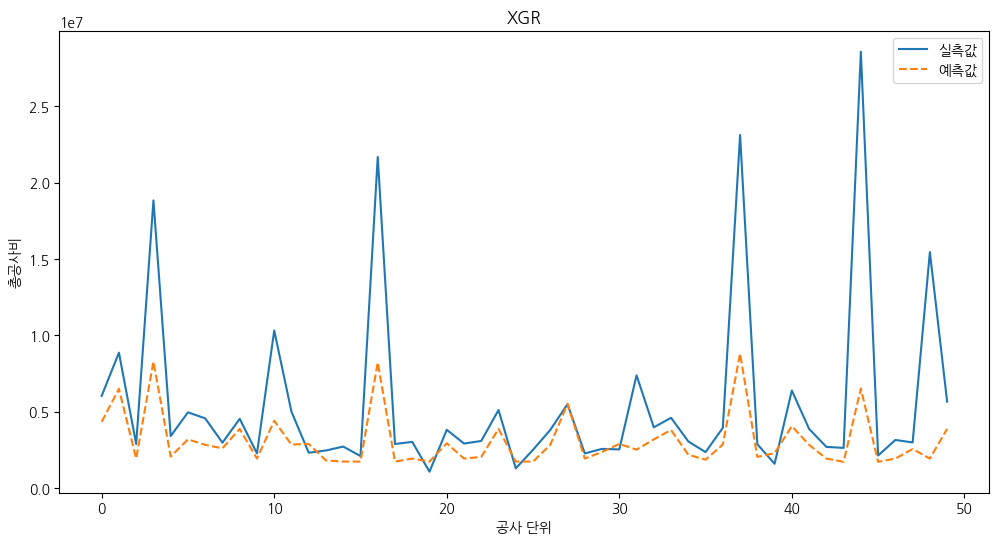

In [9]:
evaluation_values = []
model_names = []
column_names = ['r2score', 'mape', 'mse', 'rmse', 'mae']
for _model_key in ml_models.keys():
    model_fit_and_evaluation(_model_key, display_start=50, display_size=50)
    
df_evaluation = pd.DataFrame(
    evaluation_values, columns=column_names, index=model_names
)

In [10]:
df_evaluation

,r2score,mape,mse,rmse,mae
LASSO,0.548763,0.296658,1.416690e+13,3.763894e+06,1.811166e+06
RIDGE,0.548003,0.295727,1.419075e+13,3.767061e+06,1.810468e+06
KNR,0.519742,0.274367,1.507803e+13,3.883043e+06,1.793953e+06
DTR,0.187462,0.397112,2.551020e+13,5.050762e+06,2.359102e+06
RFR,0.599557,0.297092,1.257217e+13,3.545726e+06,1.739903e+06
GBR,0.633721,0.280856,1.149960e+13,3.391105e+06,1.637205e+06
EN,0.549067,0.298142,1.415734e+13,3.762624e+06,1.810375e+06
XGR,0.371157,0.318139,1.974294e+13,4.443303e+06,2.208513e+06


In [11]:
# df_evaluation